In [14]:
# 超参数
VAULE_X = 'low'
VAULE_Y = 'amount'
SIGN_LINER = 0.7 #判断是否线性相关的显著性
SIGN_PVALUE = 0.05 #判断pValue的显著性

import pandas as pd
import numpy as np

# 读取excel文件并获取指定列
#df = pd.read_csv('Data\store_6922.csv', usecols=['dt', 'amt', 'discount_amount', 'pay_amount', 'num', 'discount', 'discount_percent', 'workdays', 'holidays', 'weekdays', 'text_day', 'text_night', 'high', 'low', 'high_low', 'wc_day'], encoding='GBK')
df = pd.read_csv('Data\结果1_全站按日数据_最近2年数据.csv', usecols=['date', 'amount', 'order_cnt', 'text_day', 'text_night', 'high', 'low', 'wc_day', 'wd_day', 'wc_night', 'wd_night', 'week', 'holidays'], encoding='GBK')
print(df)

          date  order_cnt        amount text_day text_night  high  low wc_day  \
0     2023-1-1     893054  2.641542e+08        阴          阴     8    5    <3级   
1     2023-1-2    1042898  3.133427e+08        阴         多云     9    0    <3级   
2     2023-1-3    1174827  3.669793e+08       多云         多云     9    0    <3级   
3     2023-1-4     863885  2.660003e+08       多云         多云    12    3   3~4级   
4     2023-1-5     885530  2.761225e+08       多云         多云    13    2    <3级   
..         ...        ...           ...      ...        ...   ...  ...    ...   
146  2023-5-27     152688  6.893097e+07      雷阵雨          阴    27   22   3~4级   
147  2023-5-28     144274  6.454768e+07        雾        雷阵雨    36   23   4~5级   
148  2023-5-29     188121  8.248444e+07       阵雨          阴    32   22   3~4级   
149  2023-5-30      10435  5.425916e+06       小雨          阴    22   20   3~4级   
150  2023-5-31          1  2.829200e+02        阴         多云    25   20    <3级   

    wd_day wc_night wd_nigh

C:\Users\admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


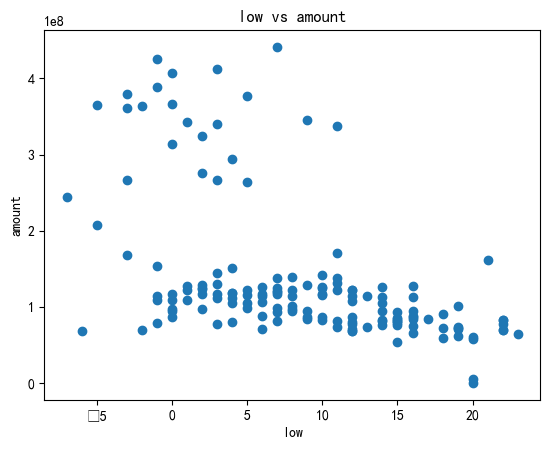

In [15]:
#画出散点图
import matplotlib.pyplot as plt

# 设置字体，确保能正确显示汉字
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文字体

# 绘制散点图
plt.scatter(df[VAULE_X], df[VAULE_Y])

# 添加标题和坐标轴标签
plt.title(VAULE_X+' vs '+VAULE_Y)
plt.xlabel(VAULE_X)
plt.ylabel(VAULE_Y)

# 显示图形
plt.show()

In [16]:
# 计算相关系数
corr = df[VAULE_X].corr(df[VAULE_Y])
print(corr)
# 判断线性关系强度
if corr > SIGN_LINER:
    print("具有强正向线性关系, 显著性为", corr)
elif corr < -SIGN_LINER:
    print("具有强负向线性关系, 显著性为", corr)
else:
    print("线性关系强度不足, 显著性为", corr)

corr :-0.5187312944948644
线性关系强度不足, 显著性为 -0.5187312944948644


In [17]:
# 拟合出 两者相关性的线性 函数

# 使用最小二乘法拟合数据
column_x = df[VAULE_X]
column_y = df[VAULE_Y]
coefficients = np.polyfit(column_x, column_y, 1)

# 提取斜率和截距
slope = coefficients[0]
intercept = coefficients[1]

# 打印拟合出的线性函数的参数
print("斜率:", slope)
print("截距:", intercept)

斜率: -6852478.747358634
截距: 195300105.85743847
